In [2]:
import numpy as np
import matplotlib.pyplot as plt
from fbm import FBM

In [41]:
N = 1000 #number of timesteps
seed = 42

The speed of this algorithm is O(n^2).

In [42]:
def Hurstfunction(t):
    return 0.5 + 0.4 * np.sin(0.05 * t) # increasing Hurst exponent

def Diffusionfunction(t):
    return 1  #Diffusion constant can vary but there is no real need now 

def Rescalingfunction(t1, t2): #Reprsent C_H1,H2---still need to change
    return 1

In [43]:
#initialize the covariant matrix
mean = np.zeros(N)
cov = np.zeros((N, N))

# Compute covariance values
for i in range(N):
    for j in range(N):
        if i - j != 0:
            cov[i, j] = np.sqrt(Diffusionfunction(i) * Diffusionfunction(j)) * Rescalingfunction(i, j) * (abs(i - j) ** (Hurstfunction(i) + Hurstfunction(j) - 2))
        else:
            cov[i, j] = np.sqrt(Diffusionfunction(i) * Diffusionfunction(j)) * Rescalingfunction(i, j) * (abs(0.01) ** (Hurstfunction(i) + Hurstfunction(j) - 2)) # the variance of fBM---Not changed(The variance is \infinity is in the original formula)
        

print("Covariance Matrix:")
print(cov)


Covariance Matrix:
[[1.00000000e+02 1.00000000e+00 5.14033171e-01 ... 3.28971175e-04
  3.73348012e-04 4.24774321e-04]
 [1.00000000e+00 8.31827606e+01 1.00000000e+00 ... 3.78097873e-04
  4.29101849e-04 4.88207901e-04]
 [5.14033171e-01 1.00000000e+00 6.92255689e+01 ... 4.34394073e-04
  4.92992353e-04 5.60898908e-04]
 ...
 [3.28971175e-04 3.78097873e-04 4.34394073e-04 ... 4.42395011e+02
  1.00000000e+00 4.10210801e-01]
 [3.73348012e-04 4.29101849e-04 4.92992353e-04 ... 1.00000000e+00
  3.73112574e+02 1.00000000e+00]
 [4.24774321e-04 4.88207901e-04 5.60898908e-04 ... 4.10210801e-01
  1.00000000e+00 3.13646356e+02]]


We can see that the covariance decreases as expected.

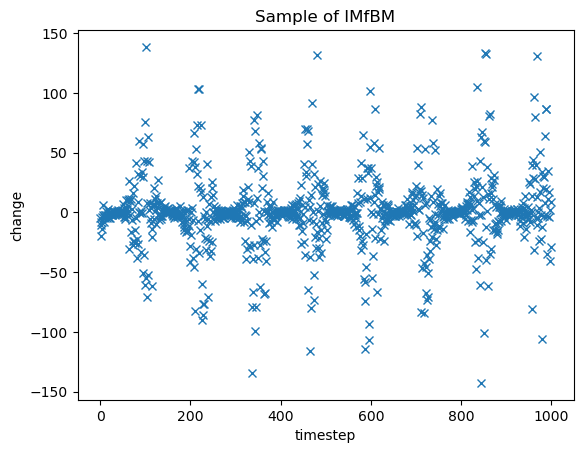

In [44]:
import matplotlib.pyplot as plt

sample = np.random.multivariate_normal(mean, cov, 1).T

timestep = np.linspace(0, N-1, N)
plt.plot(timestep,sample,'x')
#plt.plot(timestep,sample[1],'x')
plt.title("Sample of IMfBM")
plt.xlabel("timestep")
plt.ylabel("change")
#plt.xlim([0, 50])
#plt.ylim([-100, 100])
#plt.axis('equal')
plt.show()

In [45]:
IMfBM = np.zeros(N)
stepdifference = np.array(sample)
IMfBM = np.cumsum(sample)
#print(IMfBM)

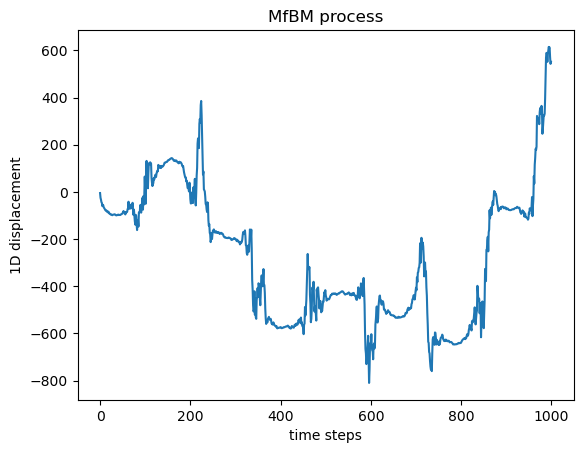

In [46]:
plt.plot(timestep, IMfBM)
plt.title("MfBM process")
plt.xlabel("time steps")
plt.ylabel("1D displacement")
plt.show()
